<a href="https://colab.research.google.com/github/royananya605/vangoghify/blob/main/artstyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import PIL.Image
import IPython.display as display
import tensorflow_hub as hub
import cv2
import time
import functools



In [5]:
# Configure TensorFlow Hub to use compressed model format for efficiency
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# Set up matplotlib visualization parameters
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False



In [6]:
def convert_tensor_to_image(tensor):
    # Scale tensor values to 0-255 range
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)

    # Handle batch dimension if present
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]

    return PIL.Image.fromarray(tensor)


In [7]:

def preprocess_image(image_path, target_dim=512):
    # Read and decode the image file
    raw_image = tf.io.read_file(image_path)
    image = tf.image.decode_image(raw_image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Calculate scaling to maintain aspect ratio
    current_shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    longest_side = max(current_shape)
    scale_factor = target_dim / longest_side

    # Resize image while preserving aspect ratio
    target_shape = tf.cast(current_shape * scale_factor, tf.int32)
    resized_image = tf.image.resize(image, target_shape)

    # Add batch dimension
    return resized_image[tf.newaxis, :]

In [8]:
def display_image(img, caption=None):
    if len(img.shape) > 3:
        img = tf.squeeze(img, axis=0)

    plt.imshow(img)
    if caption:
        plt.title(caption)


In [9]:

# Define paths to content and style images
content_image_path = '/content/thor.jpg'
style_image_path = '/content/1f22663e72.jpg'

# Load and preprocess both images
content_img = preprocess_image(content_image_path)
style_img = preprocess_image(style_image_path)

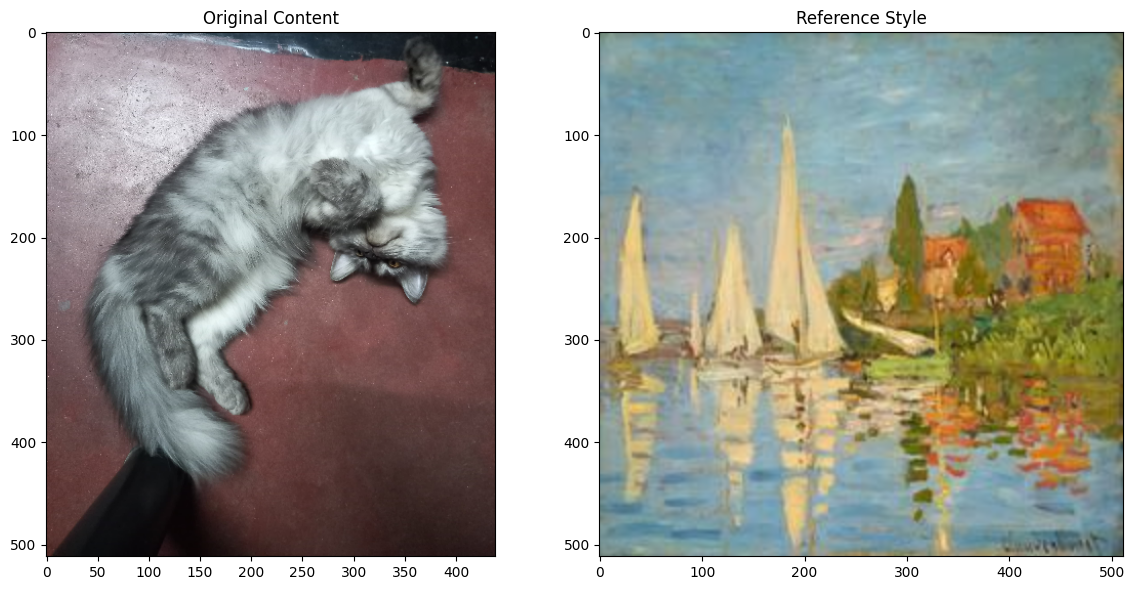

In [10]:
# Create side-by-side visualization of input images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
display_image(content_img, 'Original Content')

plt.subplot(1, 2, 2)
display_image(style_img, 'Reference Style')

plt.tight_layout()
plt.show()



Loading neural style transfer model...
Applying style transfer...


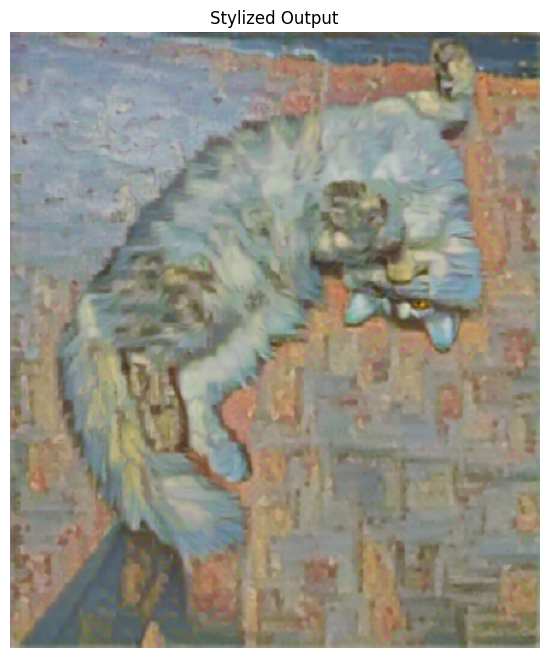

In [11]:
# Load the pre-trained arbitrary image stylization model
print("Loading neural style transfer model...")
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
print("Applying style transfer...")
result = style_transfer_model(tf.constant(content_img), tf.constant(style_img))[0]

# Display the stylized result
plt.figure(figsize=(8, 8))
stylized_result = convert_tensor_to_image(result)
plt.imshow(stylized_result)
plt.title('Stylized Output')
plt.axis('off')
plt.show()